# Análisis Automatizado de Calidad de Vinos Blancos

**Proyecto de Minería de Datos**

Este notebook realiza un análisis completo de un dataset de vinos blancos, incluyendo:
- Análisis estadístico descriptivo
- Visualizaciones
- Detección de outliers
- Análisis de correlaciones
- Generación de insights con IA (Claude)

## 1. Configuración Inicial

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy anthropic python-dotenv


   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ------------------------------ --------- 3/4 [anthropic]
   ---------------------------------------- 4/4 [anthropic]

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
import os
from dotenv import load_dotenv

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Cargar variables de entorno
load_dotenv()

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


In [3]:
# Crear directorios para outputs
os.makedirs('outputs', exist_ok=True)
os.makedirs('reports', exist_ok=True)
print("Directorios creados")

Directorios creados


## 2. Carga y Validación de Datos

In [4]:
# Cargar el dataset
# Ajusta la ruta según donde tengas el archivo
df = pd.read_csv('data/winequality-white.csv')

# Limpiar columnas vacías si existen
df = df.dropna(axis=1, how='all')

print(f"Dataset cargado: {df.shape[0]} registros, {df.shape[1]} columnas")

Dataset cargado: 4898 registros, 12 columnas


In [5]:
# Validación del dataset
print("="*60)
print("VALIDACIÓN DEL DATASET")
print("="*60)
print(f"\nNombre del dataset: Wine Quality - White Wine")
print(f"Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\nRequisitos:")
print(f"  - Mínimo 2000 registros: {'CUMPLE' if df.shape[0] >= 2000 else 'NO CUMPLE'} ({df.shape[0]})")
print(f"  - Mínimo 10 columnas: {'CUMPLE' if df.shape[1] >= 10 else 'NO CUMPLE'} ({df.shape[1]})")

VALIDACIÓN DEL DATASET

Nombre del dataset: Wine Quality - White Wine
Dimensiones: 4898 filas x 12 columnas

Requisitos:
  - Mínimo 2000 registros: CUMPLE (4898)
  - Mínimo 10 columnas: CUMPLE (12)


In [6]:
# Vista previa de los datos
print("\nPrimeras 5 filas:")
df.head()


Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Información del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# Identificar tipos de columnas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Tratar 'quality' como categórica para algunos análisis
if 'quality' in columnas_numericas:
    columnas_categoricas.append('quality')

print(f"\nColumnas numéricas ({len(columnas_numericas)}): {columnas_numericas}")
print(f"\nColumnas categóricas ({len(columnas_categoricas)}): {columnas_categoricas}")


Columnas numéricas (12): ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

Columnas categóricas (1): ['quality']


## 3. Análisis de Valores Faltantes

In [9]:
# Análisis de valores faltantes
valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

df_faltantes = pd.DataFrame({
    'Columna': valores_faltantes.index,
    'Valores Faltantes': valores_faltantes.values,
    'Porcentaje (%)': porcentaje_faltantes.values
})

print("="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)
print(f"\nPromedio de valores faltantes: {porcentaje_faltantes.mean():.2f}%")
print(f"\nDetalle por columna:")
df_faltantes

ANÁLISIS DE VALORES FALTANTES

Promedio de valores faltantes: 0.00%

Detalle por columna:


,Columna,Valores Faltantes,Porcentaje (%)
0,fixed acidity,0,0.0
1,volatile acidity,0,0.0
2,citric acid,0,0.0
3,residual sugar,0,0.0
4,chlorides,0,0.0
5,free sulfur dioxide,0,0.0
6,total sulfur dioxide,0,0.0
7,density,0,0.0
8,pH,0,0.0
9,sulphates,0,0.0


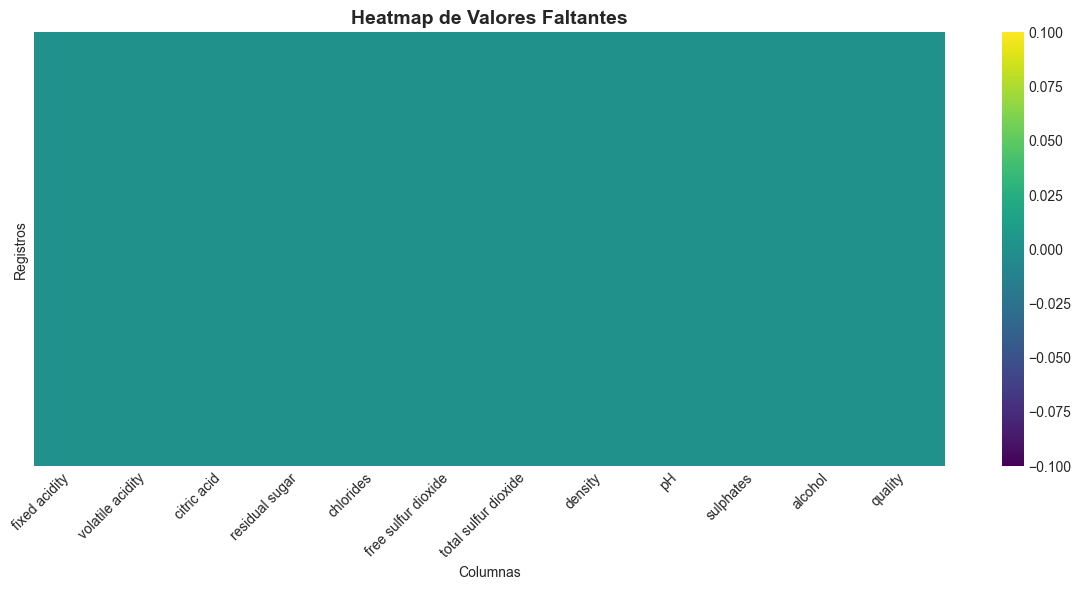

Gráfica guardada: outputs/heatmap_valores_faltantes.png


In [11]:
# Heatmap de valores faltantes (En este caso no hay faltantes, por lo que no aporta info el Heatmap)
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=ax)
ax.set_title('Heatmap de Valores Faltantes', fontsize=14, fontweight='bold')
ax.set_xlabel('Columnas')
ax.set_ylabel('Registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('outputs/heatmap_valores_faltantes.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/heatmap_valores_faltantes.png")

## 4. Análisis Estadístico Descriptivo

In [12]:
# Estadísticas descriptivas completas
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)

estadisticas = df.describe().T
estadisticas['mediana'] = df.median()
estadisticas['moda'] = df.mode().iloc[0]
estadisticas['varianza'] = df.var()
estadisticas['rango'] = estadisticas['max'] - estadisticas['min']
estadisticas['coef_var'] = (estadisticas['std'] / estadisticas['mean']) * 100

estadisticas

ESTADÍSTICAS DESCRIPTIVAS


,count,mean,std,min,25%,50%,75%,max,mediana,moda,varianza,rango,coef_var
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000,6.80000,6.800,0.712114,10.40000,12.310640
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000,0.26000,0.280,0.010160,1.02000,36.225612
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000,0.32000,0.300,0.014646,1.66000,36.212711
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000,5.20000,1.200,25.725770,65.20000,79.357355
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600,0.04300,0.044,0.000477,0.33700,47.731797
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000,34.00000,29.000,289.242720,287.00000,48.167827
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000,134.00000,111.000,1806.085491,431.00000,30.715425
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898,0.99374,0.992,0.000009,0.05187,0.300888
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000,3.18000,3.140,0.022801,1.10000,4.736135
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000,0.47000,0.500,0.013025,0.86000,23.298267


In [13]:
# Análisis de la variable categórica (quality)
print("\n" + "="*60)
print("ANÁLISIS DE VARIABLE CATEGÓRICA: quality")
print("="*60)

frecuencias = df['quality'].value_counts().sort_index()
porcentajes = (frecuencias / len(df) * 100).round(2)

df_quality = pd.DataFrame({
    'Calidad': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje (%)': porcentajes.values
})

print(f"\nModa: {df['quality'].mode()[0]}")
print(f"\nDistribución de frecuencias:")
df_quality


ANÁLISIS DE VARIABLE CATEGÓRICA: quality

Moda: 6

Distribución de frecuencias:


,Calidad,Frecuencia,Porcentaje (%)
0,3,20,0.41
1,4,163,3.33
2,5,1457,29.75
3,6,2198,44.88
4,7,880,17.97
5,8,175,3.57
6,9,5,0.10


## 5. Visualizaciones

### 5.1 Histogramas (Variables Numéricas)

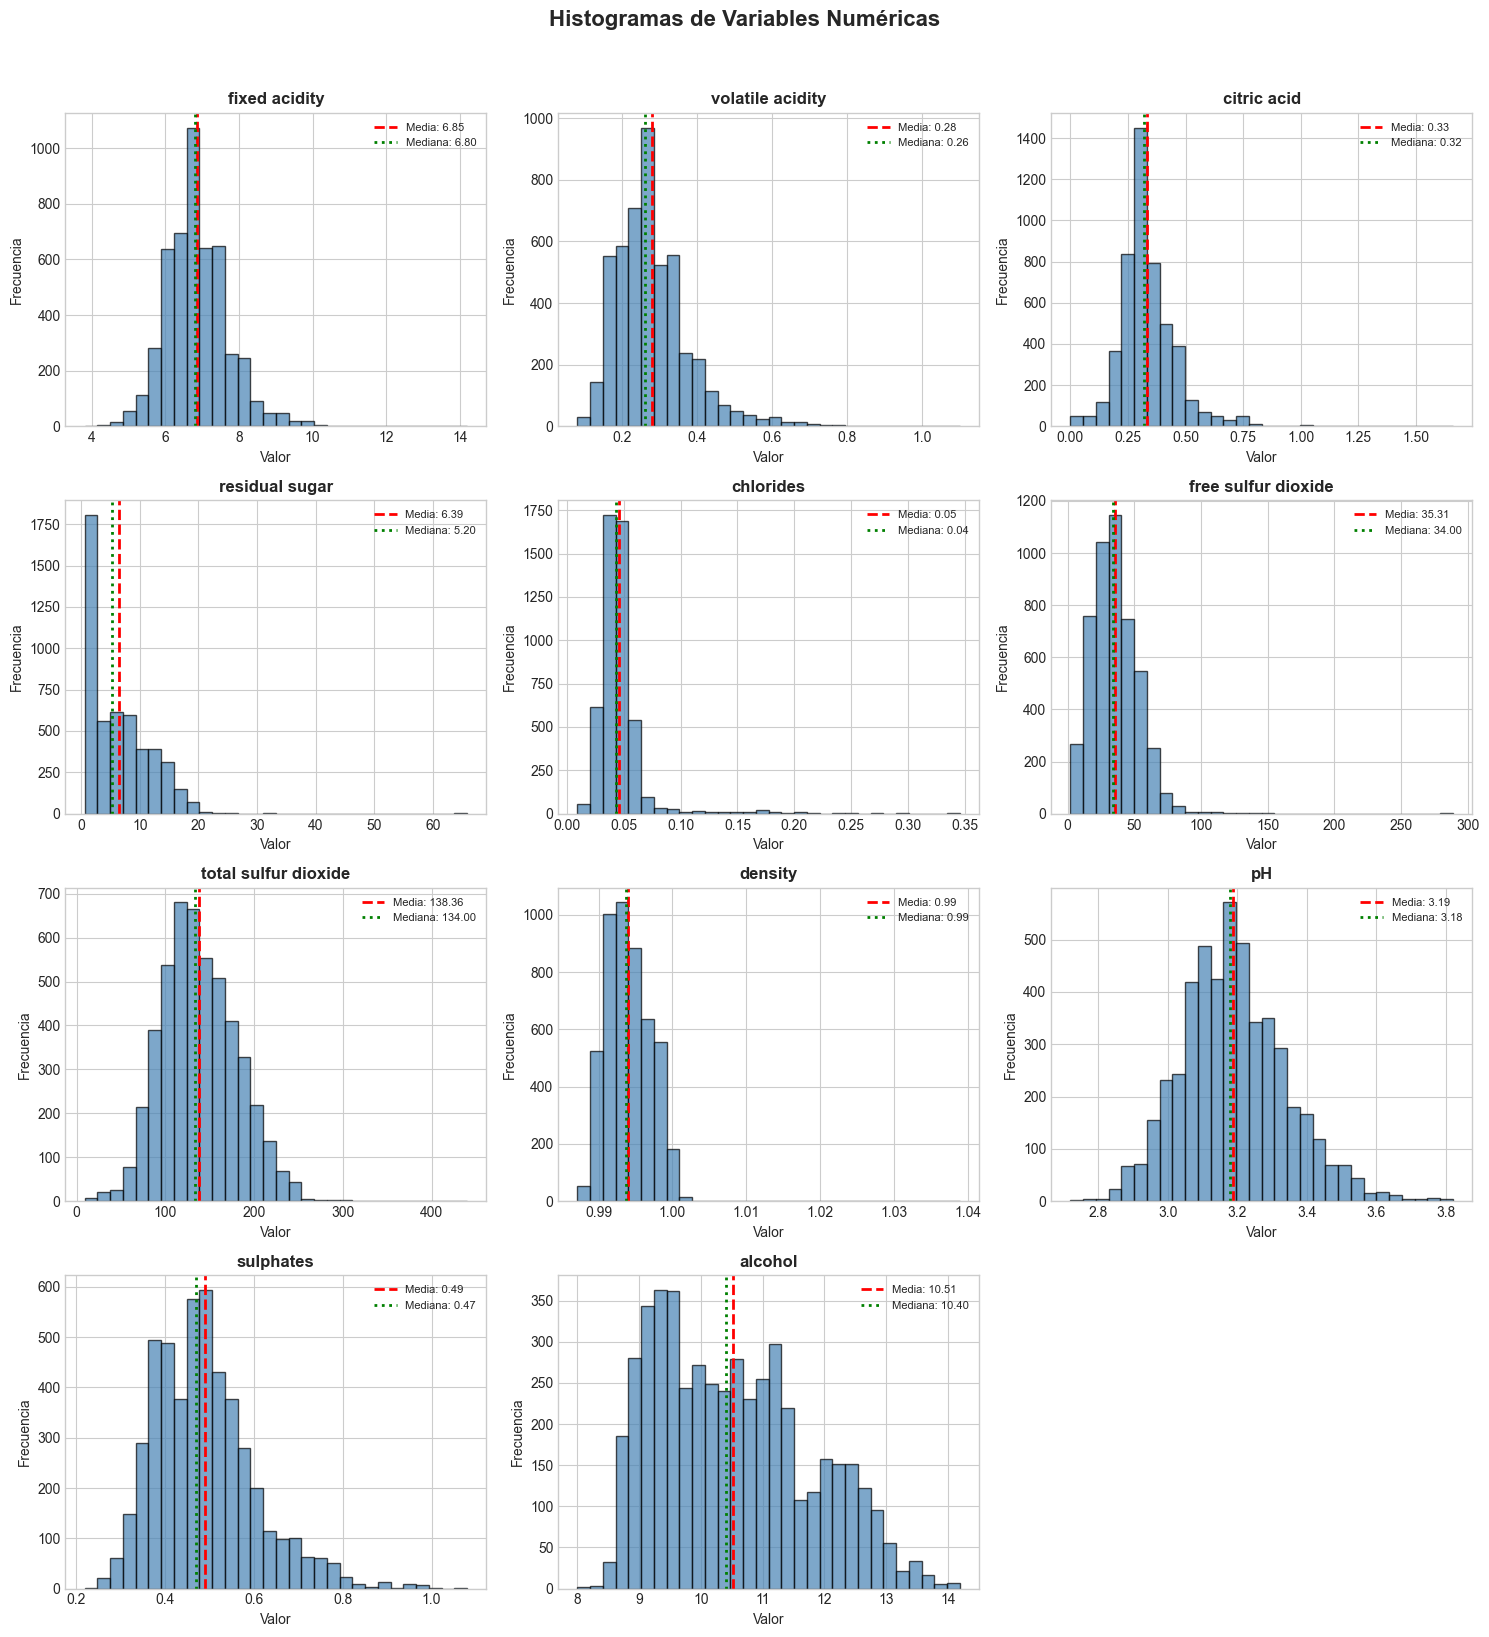

Gráfica guardada: outputs/histogramas.png


In [14]:
# Histogramas para todas las variables numéricas
cols_para_histograma = [col for col in columnas_numericas if col != 'quality']
n_cols = 3
n_rows = (len(cols_para_histograma) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_para_histograma):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df[col].mean():.2f}')
    ax.axvline(df[col].median(), color='green', linestyle=':', linewidth=2, label=f'Mediana: {df[col].median():.2f}')
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend(fontsize=8)

# Ocultar ejes vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Histogramas de Variables Numéricas', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outputs/histogramas.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/histogramas.png")

### 5.2 Boxplots (Detección de Outliers)

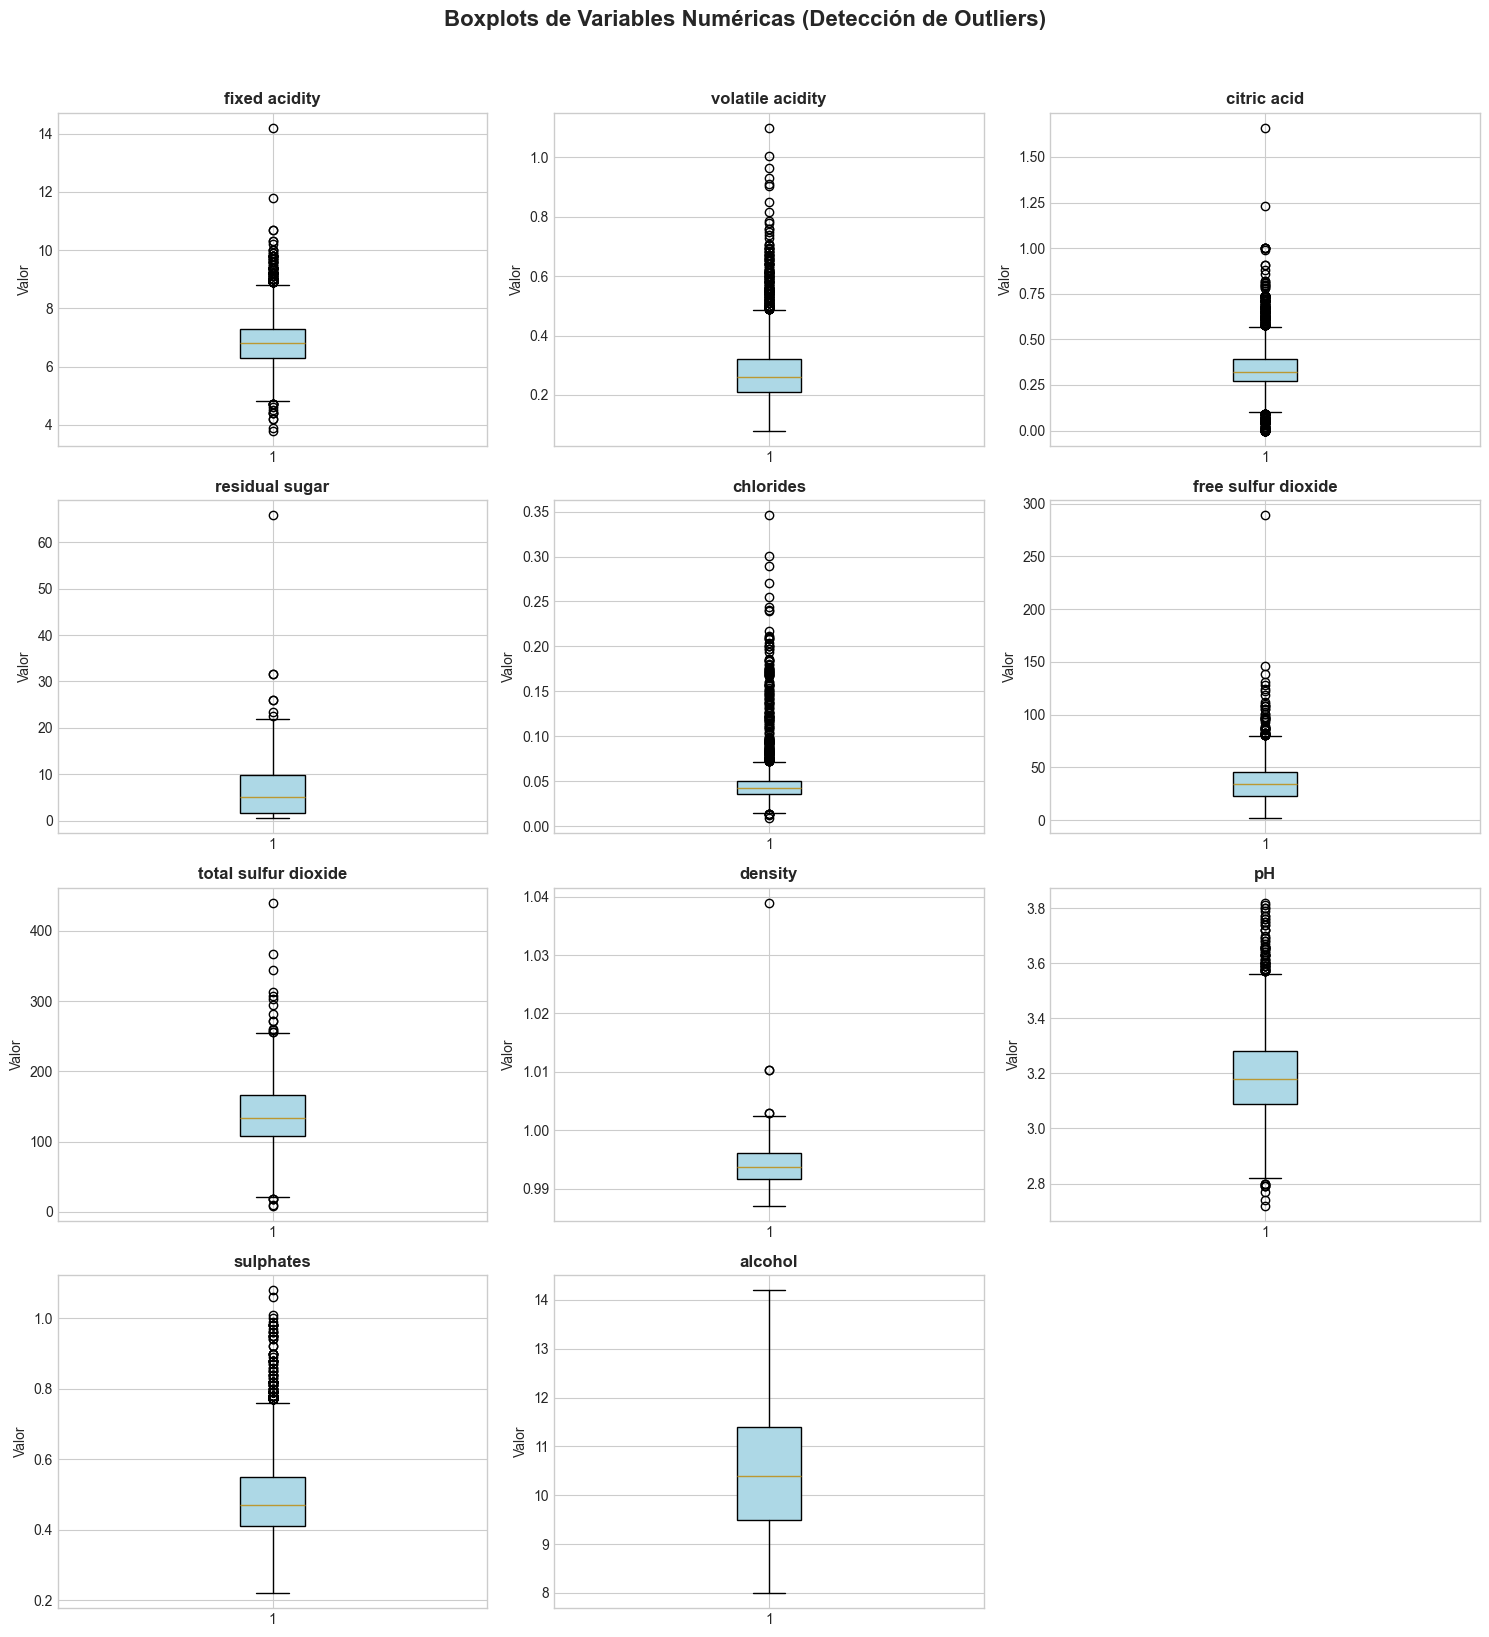

Gráfica guardada: outputs/boxplots.png


In [15]:
# Boxplots para todas las variables numéricas
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_para_histograma):
    ax = axes[i]
    bp = ax.boxplot(df[col].dropna(), patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Valor')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Boxplots de Variables Numéricas (Detección de Outliers)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outputs/boxplots.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/boxplots.png")

In [16]:
# Contar outliers usando método IQR
def contar_outliers_iqr(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = ((columna < limite_inferior) | (columna > limite_superior)).sum()
    return outliers

print("\n" + "="*60)
print("DETECCIÓN DE OUTLIERS (Método IQR)")
print("="*60)

outliers_por_columna = {}
total_outliers = 0

for col in cols_para_histograma:
    n_outliers = contar_outliers_iqr(df[col])
    outliers_por_columna[col] = n_outliers
    total_outliers += n_outliers
    print(f"{col}: {n_outliers} outliers ({n_outliers/len(df)*100:.2f}%)")

print(f"\nTOTAL DE OUTLIERS: {total_outliers}")


DETECCIÓN DE OUTLIERS (Método IQR)
fixed acidity: 119 outliers (2.43%)
volatile acidity: 186 outliers (3.80%)
citric acid: 270 outliers (5.51%)
residual sugar: 7 outliers (0.14%)
chlorides: 208 outliers (4.25%)
free sulfur dioxide: 50 outliers (1.02%)
total sulfur dioxide: 19 outliers (0.39%)
density: 5 outliers (0.10%)
pH: 75 outliers (1.53%)
sulphates: 124 outliers (2.53%)
alcohol: 0 outliers (0.00%)

TOTAL DE OUTLIERS: 1063


### 5.3 Gráfico de Barras (Variable Categórica)

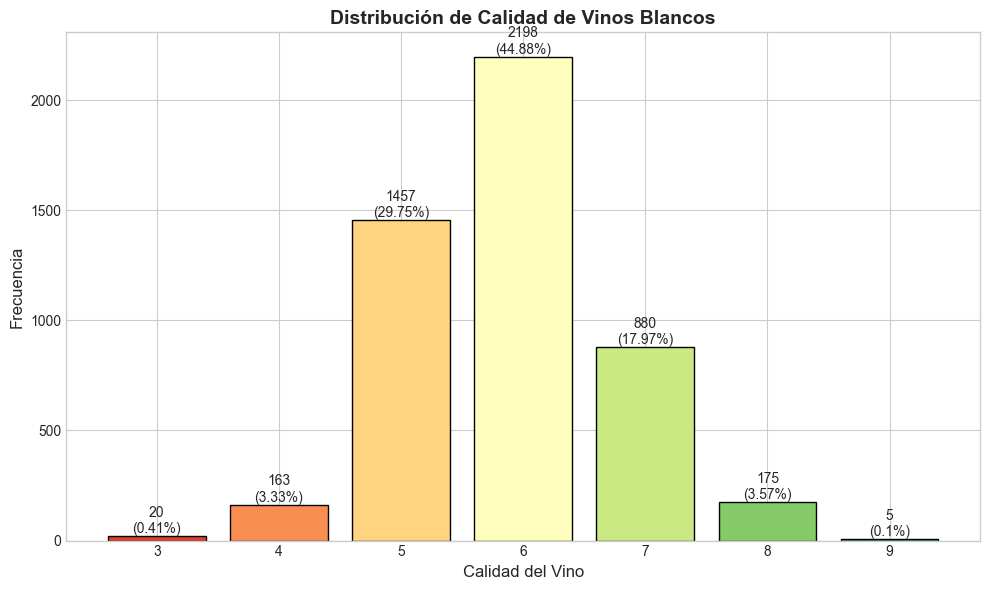

Gráfica guardada: outputs/barras_quality.png


In [17]:
# Gráfico de barras para la variable quality
fig, ax = plt.subplots(figsize=(10, 6))

colores = sns.color_palette('RdYlGn', n_colors=len(frecuencias))
bars = ax.bar(frecuencias.index.astype(str), frecuencias.values, color=colores, edgecolor='black')

# Agregar etiquetas de valor
for bar, freq, pct in zip(bars, frecuencias.values, porcentajes.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{freq}\n({pct}%)',
            ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Calidad del Vino', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)
ax.set_title('Distribución de Calidad de Vinos Blancos', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/barras_quality.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/barras_quality.png")

## 6. Análisis de Correlaciones

In [18]:
# Calcular matriz de correlación (Pearson)
matriz_correlacion = df[columnas_numericas].corr(method='pearson')

print("="*60)
print("MATRIZ DE CORRELACIÓN (Pearson)")
print("="*60)
matriz_correlacion.round(3)

MATRIZ DE CORRELACIÓN (Pearson)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000,-0.023,0.289,0.089,0.023,-0.049,0.091,0.265,-0.426,-0.017,-0.121,-0.114
volatile acidity,-0.023,1.000,-0.149,0.064,0.071,-0.097,0.089,0.027,-0.032,-0.036,0.068,-0.195
citric acid,0.289,-0.149,1.000,0.094,0.114,0.094,0.121,0.150,-0.164,0.062,-0.076,-0.009
residual sugar,0.089,0.064,0.094,1.000,0.089,0.299,0.401,0.839,-0.194,-0.027,-0.451,-0.098
chlorides,0.023,0.071,0.114,0.089,1.000,0.101,0.199,0.257,-0.090,0.017,-0.360,-0.210
free sulfur dioxide,-0.049,-0.097,0.094,0.299,0.101,1.000,0.616,0.294,-0.001,0.059,-0.250,0.008
total sulfur dioxide,0.091,0.089,0.121,0.401,0.199,0.616,1.000,0.530,0.002,0.135,-0.449,-0.175
density,0.265,0.027,0.150,0.839,0.257,0.294,0.530,1.000,-0.094,0.074,-0.780,-0.307
pH,-0.426,-0.032,-0.164,-0.194,-0.090,-0.001,0.002,-0.094,1.000,0.156,0.121,0.099
sulphates,-0.017,-0.036,0.062,-0.027,0.017,0.059,0.135,0.074,0.156,1.000,-0.017,0.054


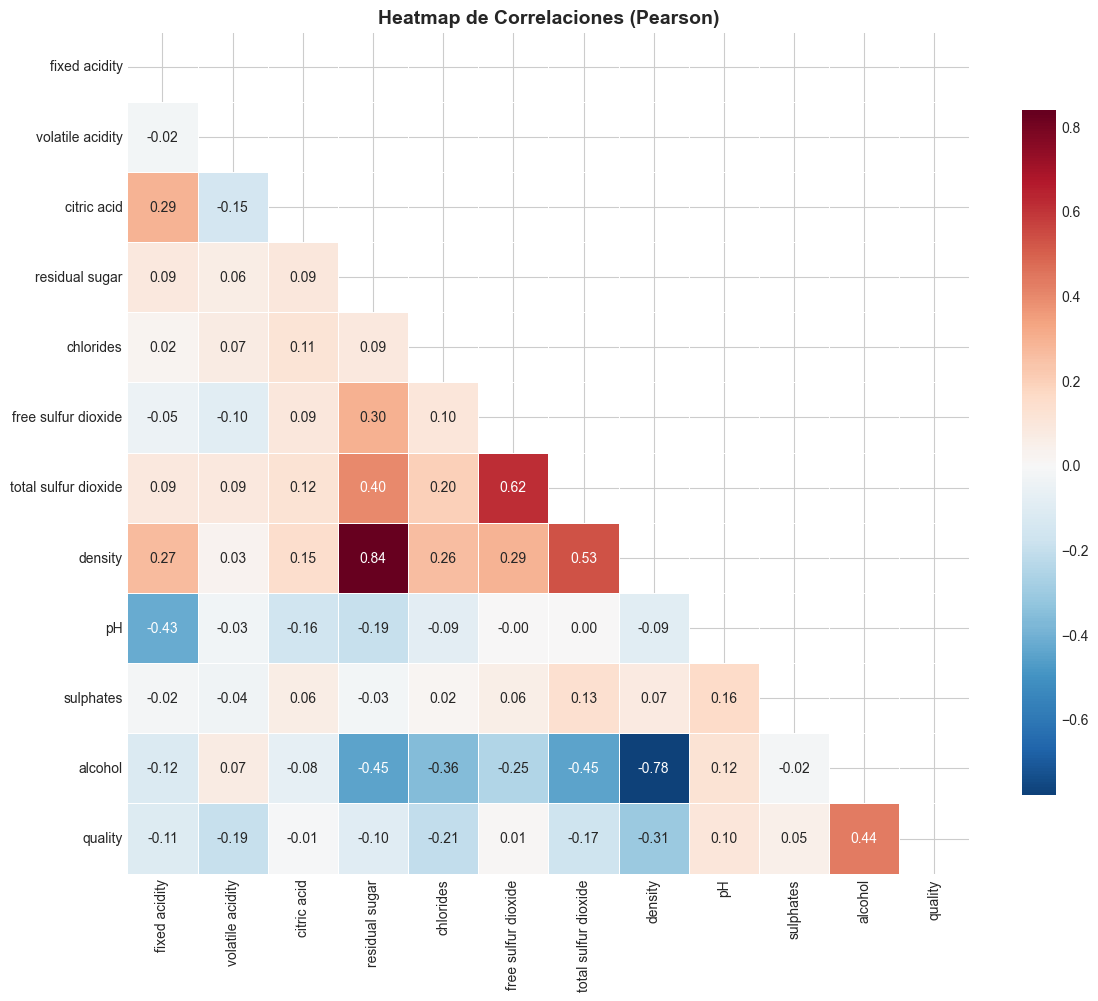

Gráfica guardada: outputs/heatmap_correlaciones.png


In [19]:
# Heatmap de correlaciones
fig, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
sns.heatmap(matriz_correlacion, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            ax=ax)

ax.set_title('Heatmap de Correlaciones (Pearson)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/heatmap_correlaciones.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/heatmap_correlaciones.png")

In [20]:
# Identificar las 5 correlaciones más fuertes (valores absolutos)
print("\n" + "="*60)
print("TOP 5 CORRELACIONES MÁS FUERTES")
print("="*60)

# Obtener pares de correlaciones (sin duplicados ni diagonal)
correlaciones_pares = []
for i in range(len(matriz_correlacion.columns)):
    for j in range(i+1, len(matriz_correlacion.columns)):
        col1 = matriz_correlacion.columns[i]
        col2 = matriz_correlacion.columns[j]
        corr = matriz_correlacion.iloc[i, j]
        correlaciones_pares.append((col1, col2, corr, abs(corr)))

# Ordenar por valor absoluto
correlaciones_pares.sort(key=lambda x: x[3], reverse=True)

# Mostrar top 5
top_correlaciones = correlaciones_pares[:5]
df_top_corr = pd.DataFrame(top_correlaciones, columns=['Variable 1', 'Variable 2', 'Correlación', 'Abs(Correlación)'])
df_top_corr.index = range(1, 6)
df_top_corr


TOP 5 CORRELACIONES MÁS FUERTES


,Variable 1,Variable 2,Correlación,Abs(Correlación)
1,residual sugar,density,0.838966,0.838966
2,density,alcohol,-0.780138,0.780138
3,free sulfur dioxide,total sulfur dioxide,0.615501,0.615501
4,total sulfur dioxide,density,0.529881,0.529881
5,residual sugar,alcohol,-0.450631,0.450631


## 7. Visualizaciones Adicionales

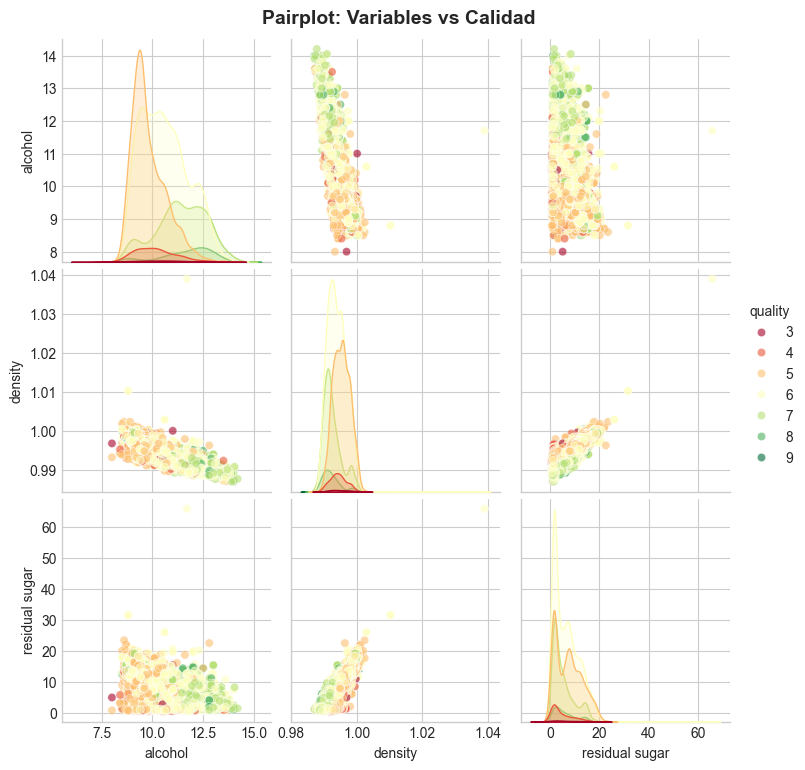

Gráfica guardada: outputs/pairplot.png


In [21]:
# Pairplot para variables seleccionadas
variables_importantes = ['alcohol', 'density', 'residual sugar', 'quality']

g = sns.pairplot(df[variables_importantes], 
                 hue='quality', 
                 palette='RdYlGn',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6})

g.fig.suptitle('Pairplot: Variables vs Calidad', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('outputs/pairplot.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/pairplot.png")

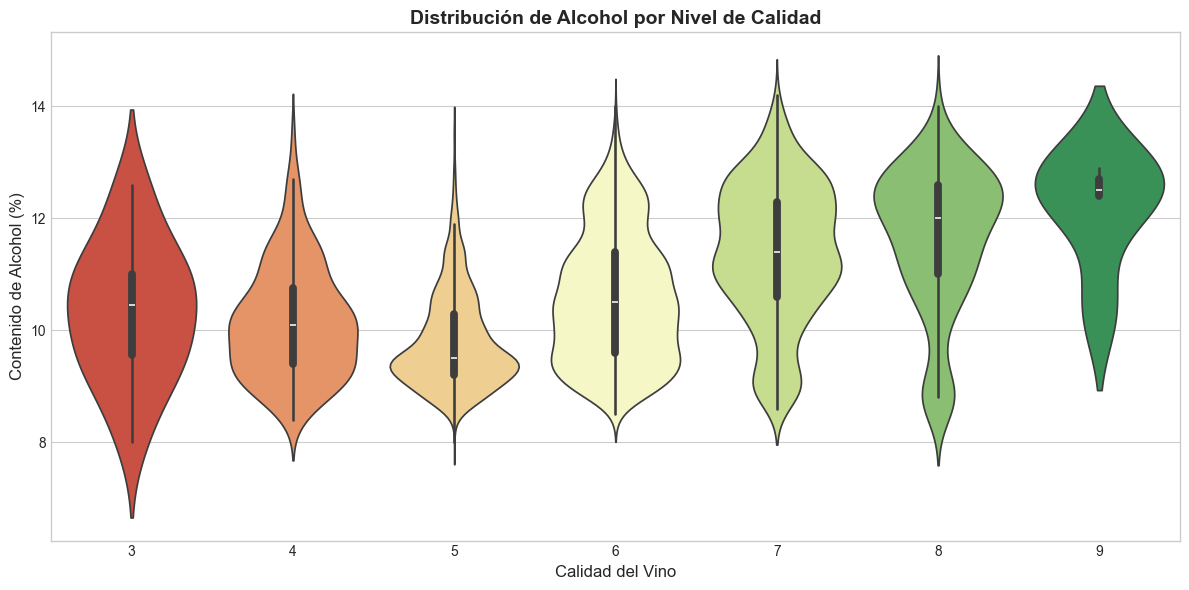

Gráfica guardada: outputs/violin_alcohol_quality.png


In [22]:
# Violin plot: Alcohol por Calidad
fig, ax = plt.subplots(figsize=(12, 6))

sns.violinplot(data=df, x='quality', y='alcohol', palette='RdYlGn', ax=ax)
ax.set_xlabel('Calidad del Vino', fontsize=12)
ax.set_ylabel('Contenido de Alcohol (%)', fontsize=12)
ax.set_title('Distribución de Alcohol por Nivel de Calidad', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/violin_alcohol_quality.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfica guardada: outputs/violin_alcohol_quality.png")

## 8. Resumen para IA

In [23]:
# Preparar resumen del análisis para enviar a Claude
resumen_analisis = f"""
RESUMEN DEL ANÁLISIS DE DATOS - WINE QUALITY (WHITE WINE)
=========================================================

1. INFORMACIÓN DEL DATASET:
   - Nombre: Wine Quality - White Wine
   - Dimensiones: {df.shape[0]} registros x {df.shape[1]} columnas
   - Columnas numéricas: {len(columnas_numericas)}
   - Columnas categóricas: 1 (quality tratada como categórica)

2. VALORES FALTANTES:
   - Promedio de valores faltantes: {porcentaje_faltantes.mean():.2f}%
   - Columnas con valores faltantes: {(valores_faltantes > 0).sum()}

3. ESTADÍSTICAS DESCRIPTIVAS:
{estadisticas[['mean', 'std', 'min', 'max', 'mediana']].to_string()}

4. DISTRIBUCIÓN DE CALIDAD:
{df_quality.to_string()}

5. TOP 5 CORRELACIONES MÁS FUERTES:
{df_top_corr.to_string()}

6. OUTLIERS DETECTADOS (Método IQR):
   - Total de outliers: {total_outliers}
   - Detalle por variable:
     {chr(10).join([f'     - {k}: {v} outliers' for k, v in outliers_por_columna.items()])}

7. OBSERVACIONES INICIALES:
   - La variable 'quality' tiene valores entre {df['quality'].min()} y {df['quality'].max()}
   - La mayoría de vinos tienen calidad {df['quality'].mode()[0]} (moda)
   - El alcohol varía entre {df['alcohol'].min():.1f}% y {df['alcohol'].max():.1f}%
   - La densidad está altamente correlacionada con el azúcar residual
"""

print(resumen_analisis)


RESUMEN DEL ANÁLISIS DE DATOS - WINE QUALITY (WHITE WINE)

1. INFORMACIÓN DEL DATASET:
   - Nombre: Wine Quality - White Wine
   - Dimensiones: 4898 registros x 12 columnas
   - Columnas numéricas: 12
   - Columnas categóricas: 1 (quality tratada como categórica)

2. VALORES FALTANTES:
   - Promedio de valores faltantes: 0.00%
   - Columnas con valores faltantes: 0

3. ESTADÍSTICAS DESCRIPTIVAS:
                            mean        std      min        max    mediana
fixed acidity           6.854788   0.843868  3.80000   14.20000    6.80000
volatile acidity        0.278241   0.100795  0.08000    1.10000    0.26000
citric acid             0.334192   0.121020  0.00000    1.66000    0.32000
residual sugar          6.391415   5.072058  0.60000   65.80000    5.20000
chlorides               0.045772   0.021848  0.00900    0.34600    0.04300
free sulfur dioxide    35.308085  17.007137  2.00000  289.00000   34.00000
total sulfur dioxide  138.360657  42.498065  9.00000  440.00000  134.00000


## 9. Generación de Insights con Claude (API de Anthropic)

In [24]:
# Configuración del cliente de Anthropic
from anthropic import Anthropic

# Verificar que la API key está configurada
api_key = os.getenv("ANTHROPIC_API_KEY")

if not api_key:
    print("ERROR: No se encontró ANTHROPIC_API_KEY")
    print("Por favor, configura tu API key en el archivo .env")
else:
    print("API Key encontrada correctamente")
    # Mostrar solo los primeros caracteres por seguridad
    print(f"API Key: {api_key[:15]}...")

API Key encontrada correctamente
API Key: sk-ant-api03-yh...


In [25]:
# Función para generar insights con Claude
def generar_insights_con_claude(resumen, api_key):
    """
    Envía el resumen del análisis a Claude y obtiene insights.
    """
    client = Anthropic(api_key=api_key)
    
    prompt = f"""
    Eres un experto en análisis de datos y ciencia de datos. 
    A continuación te presento el resumen de un análisis exploratorio de datos sobre calidad de vinos blancos.
    
    Por favor, genera un reporte ejecutivo que incluya:
    
    1. RESUMEN EJECUTIVO (2-3 párrafos)
       - Descripción general del dataset
       - Calidad de los datos
       - Principales características
    
    2. TRES HALLAZGOS CLAVE
       - Insights importantes descubiertos en el análisis
       - Patrones o tendencias relevantes
       - Relaciones significativas entre variables
    
    3. TRES RECOMENDACIONES DE PREPROCESAMIENTO
       - Sugerencias para mejorar la calidad de los datos
       - Técnicas recomendadas para manejar outliers
       - Transformaciones sugeridas para modelado
    
    4. CONCLUSIONES Y PRÓXIMOS PASOS
       - Resumen de conclusiones
       - Recomendaciones para análisis futuros
    
    DATOS DEL ANÁLISIS:
    {resumen}
    
    Por favor, responde en español y de manera profesional.
    """
    
    response = client.messages.create(
        model="claude-sonnet-4-20250514",
        max_tokens=3000,
        messages=[
            {"role": "user", "content": prompt}
        ]
    )
    
    return response.content[0].text

In [27]:
# Generar insights (solo si hay API key)
if api_key:
    print("Generando insights con Claude...")
    print("(Esto puede tomar unos segundos)\n")
    
    try:
        insights = generar_insights_con_claude(resumen_analisis, api_key)
        print("="*80)
        print("REPORTE EJECUTIVO GENERADO POR CLAUDE")
        print("="*80)
        print(insights)
        
        # Guardar insights en archivo
        with open('reports/insights_claude.txt', 'w', encoding='utf-8') as f:
            f.write("REPORTE EJECUTIVO - ANÁLISIS DE CALIDAD DE VINOS BLANCOS\n")
            f.write("="*60 + "\n\n")
            f.write(insights)
        print("\nInsights guardados en: reports/insights_claude.txt")
        
    except Exception as e:
        print(f"Error al generar insights: {e}")
else:
    print("No se puede generar insights sin API key.")
    print("Por favor, configura ANTHROPIC_API_KEY en el archivo .env")

Generando insights con Claude...
(Esto puede tomar unos segundos)

REPORTE EJECUTIVO GENERADO POR CLAUDE
# REPORTE EJECUTIVO: ANÁLISIS DE CALIDAD DE VINOS BLANCOS

## 1. RESUMEN EJECUTIVO

El dataset analizado contiene información de 4,898 vinos blancos con 12 variables fisicoquímicas que determinan su calidad. Los datos presentan una excelente integridad con 0% de valores faltantes, lo que indica una recolección de datos sistemática y completa. Las variables incluyen medidas de acidez, azúcares, sulfitos, densidad, pH, sulfatos y contenido alcohólico, todas ellas fundamentales en la caracterización enológica.

La distribución de calidad muestra un patrón típicamente normal, concentrándose en valores medios (calidades 5-6 representan el 74.63% de la muestra), con muy pocos ejemplos de vinos de calidad excepcional (calidad 9: 0.10%) o deficiente (calidad 3: 0.41%). Esta distribución sugiere que el dataset representa principalmente vinos de calidad comercial estándar, lo que podría limit

## 10. Resumen Final y Exportación

In [28]:
# Resumen final del proyecto
print("="*80)
print("RESUMEN FINAL DEL ANÁLISIS")
print("="*80)
print(f"""
DATASET: Wine Quality - White Wine
REGISTROS: {df.shape[0]}
COLUMNAS: {df.shape[1]}

ARCHIVOS GENERADOS:
  - outputs/heatmap_valores_faltantes.png
  - outputs/histogramas.png
  - outputs/boxplots.png
  - outputs/barras_quality.png
  - outputs/heatmap_correlaciones.png
  - outputs/pairplot.png
  - outputs/violin_alcohol_quality.png
  - reports/insights_claude.txt

MÉTRICAS CLAVE:
  - Valores faltantes promedio: {porcentaje_faltantes.mean():.2f}%
  - Total de outliers: {total_outliers}
  - Correlación más fuerte: {top_correlaciones[0][0]} vs {top_correlaciones[0][1]} ({top_correlaciones[0][2]:.3f})
  - Calidad más común: {df['quality'].mode()[0]}
""")

RESUMEN FINAL DEL ANÁLISIS

DATASET: Wine Quality - White Wine
REGISTROS: 4898
COLUMNAS: 12

ARCHIVOS GENERADOS:
  - outputs/heatmap_valores_faltantes.png
  - outputs/histogramas.png
  - outputs/boxplots.png
  - outputs/barras_quality.png
  - outputs/heatmap_correlaciones.png
  - outputs/pairplot.png
  - outputs/violin_alcohol_quality.png
  - reports/insights_claude.txt

MÉTRICAS CLAVE:
  - Valores faltantes promedio: 0.00%
  - Total de outliers: 1063
  - Correlación más fuerte: residual sugar vs density (0.839)
  - Calidad más común: 6



In [29]:
# Listar archivos generados
import os

print("\nArchivos en carpeta outputs/")
for f in os.listdir('outputs'):
    print(f"  - {f}")

print("\nArchivos en carpeta reports/")
if os.path.exists('reports'):
    for f in os.listdir('reports'):
        print(f"  - {f}")


Archivos en carpeta outputs/
  - barras_quality.png
  - boxplots.png
  - heatmap_correlaciones.png
  - heatmap_valores_faltantes.png
  - histogramas.png
  - pairplot.png
  - violin_alcohol_quality.png

Archivos en carpeta reports/
  - insights_claude.txt


---

## Fin del Análisis

Este notebook ha completado:
1. Carga y validación del dataset
2. Análisis de valores faltantes
3. Estadísticas descriptivas completas
4. Visualizaciones (histogramas, boxplots, barras, heatmaps)
5. Análisis de correlaciones
6. Detección de outliers
7. Generación de insights con Claude (API de Anthropic)